<a href="https://colab.research.google.com/github/jcarvaj18643/CarEvaluation/blob/main/calidad_de_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calidad de Carros (Version Random Forest)

Titulo: Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil

Nombres : Jaime Andres Carvajal Gutierrez

 Edison Yesid Herrera,
 Johana Trejos,
 Luisa Fernanda Cristancho

Descripcion:


El conjunto de datos de evaluación de coches de la Universidad de California, Irvine, es una base de datos estructurada que evalúa automóviles utilizando un modelo de decisión jerárquico simple, diseñado originalmente para demostrar un sistema experto para la toma de decisiones llamado DEX. Esta base fue creada por Marko Bohanec y V. Rajkovic y es utilizada para probar métodos de inducción constructiva y descubrimiento de estructuras.

In [ ]:
import pandas as pd
import seaborn as sns

Carga los datos desde el archivo "car.csv" usando pandas.

Muestra las primeras filas del DataFrame y un resumen estadístico que incluye información sobre todas las variables.

Usa .info() para obtener un resumen de los tipos de datos y la cantidad de valores no nulos en cada columna, ayudando a identificar las variables numéricas y cualitativas.

In [ ]:
dfAutos = pd.read_csv('/content/car.csv')

print(dfAutos.head())
print(dfAutos.describe(include='all'))
print(dfAutos.info())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 

Determina el número de registros y variables en el dataset.

Identifica explícitamente que todas las variables son cualitativas (categóricas) en este caso, y no hay variables numéricas.

Genera y muestra un resumen estructurado de la información del dataset, incluyendo tipos de datos y cantidades.

In [ ]:
# Determining the number of variables and records
num_records = dfAutos.shape[0]
num_variables = dfAutos.shape[1]

# Variable types: As provided, all are categorical and none are explicitly numerical
variable_types = dfAutos.dtypes

# Generate a summary of the dataset
summary = {
    'Number of Records': num_records,
    'Number of Variables': num_variables,
    'Variable Types \n': variable_types
}

print(summary)

{'Number of Records': 1728, 'Number of Variables': 7, 'Variable Types \n': buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object}


Define y asigna nombres a las columnas del DataFrame para clarificar el contenido de cada una, incluyendo la variable objetivo 'class'.

Esta clarificación ayuda a la interpretación y manejo correcto de las variables durante el análisis.

In [ ]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Assigning column names to the dataframe
dfAutos.columns = column_names

dfAutos.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Display the first few rows of the dataframe and the distribution of the target variable 'class'
data_head = dfAutos.head()
class_distribution = dfAutos['class'].value_counts(normalize=True)

print(data_head)
print(class_distribution)

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64


Realiza la codificación One-Hot de las variables categóricas para convertirlas en formato numérico, permitiendo su uso en modelos de aprendizaje automático.

Muestra las primeras filas del DataFrame codificado para verificar la correcta transformación de los datos.

In [ ]:


# Codificación One-Hot de las variables categóricas
df_encoded = pd.get_dummies(dfAutos)

print(df_encoded.head())

   buying_high  buying_low  buying_med  buying_vhigh  maint_high  maint_low  \
0        False       False       False          True       False      False   
1        False       False       False          True       False      False   
2        False       False       False          True       False      False   
3        False       False       False          True       False      False   
4        False       False       False          True       False      False   

   maint_med  maint_vhigh  doors_2  doors_3  ...  lug_boot_big  lug_boot_med  \
0      False         True     True    False  ...         False         False   
1      False         True     True    False  ...         False         False   
2      False         True     True    False  ...         False         False   
3      False         True     True    False  ...         False          True   
4      False         True     True    False  ...         False          True   

   lug_boot_small  safety_high  safety_low  

Utiliza train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba.
Establece un tamaño del 20% para el conjunto de prueba y estratifica la partición basándose en la distribución de la variable objetivo.
Muestra información sobre la forma de los conjuntos resultantes, verificando la correcta partición.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'class' in col])
y = df_encoded[[col for col in df_encoded.columns if 'class' in col]]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=123,
    stratify=y.idxmax(axis=1)  # Usa las etiquetas desbinarizadas para estratificación
)

partition_info = {
    "Train Features Shape": X_train.shape,
    "Test Features Shape": X_test.shape,
    "Train Labels Shape": y_train.shape,
    "Test Labels Shape": y_test.shape
}

partition_info

print(X_train.head())
print(y_train.head())

      buying_high  buying_low  buying_med  buying_vhigh  maint_high  \
1417        False        True       False         False        True   
1403        False        True       False         False       False   
967         False       False        True         False       False   
1476        False        True       False         False        True   
1364        False        True       False         False       False   

      maint_low  maint_med  maint_vhigh  doors_2  doors_3  ...  doors_5more  \
1417      False      False        False     True    False  ...        False   
1403      False      False         True    False    False  ...         True   
967       False      False         True    False    False  ...         True   
1476      False      False        False    False    False  ...        False   
1364      False      False         True    False    False  ...        False   

      persons_2  persons_4  persons_more  lug_boot_big  lug_boot_med  \
1417      False       True

Entrena un modelo de clasificador Random Forest con los datos de entrenamiento.

Realiza predicciones sobre el conjunto de prueba y genera una matriz de confusión para evaluar el rendimiento inicial del modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


modelocRF = RandomForestClassifier(random_state=123)
modelocRF.fit(X_train, y_train.idxmax(axis=1))

ypred = modelocRF.predict(X_test)

conf_matrix = confusion_matrix(y_test.idxmax(axis=1), ypred)

print("Confusion Matrix: \n", conf_matrix)


Confusion Matrix: 
 [[ 75   2   0   0]
 [  2  11   0   1]
 [  5   0 237   0]
 [  1   0   0  12]]


Configura y muestra una matriz de confusión visual para el clasificador Random Forest, usando matplotlib y scikit-learn.

Esta visualización ayuda a entender mejor el rendimiento del modelo en la clasificación de las diferentes categorías de la variable 'class'.

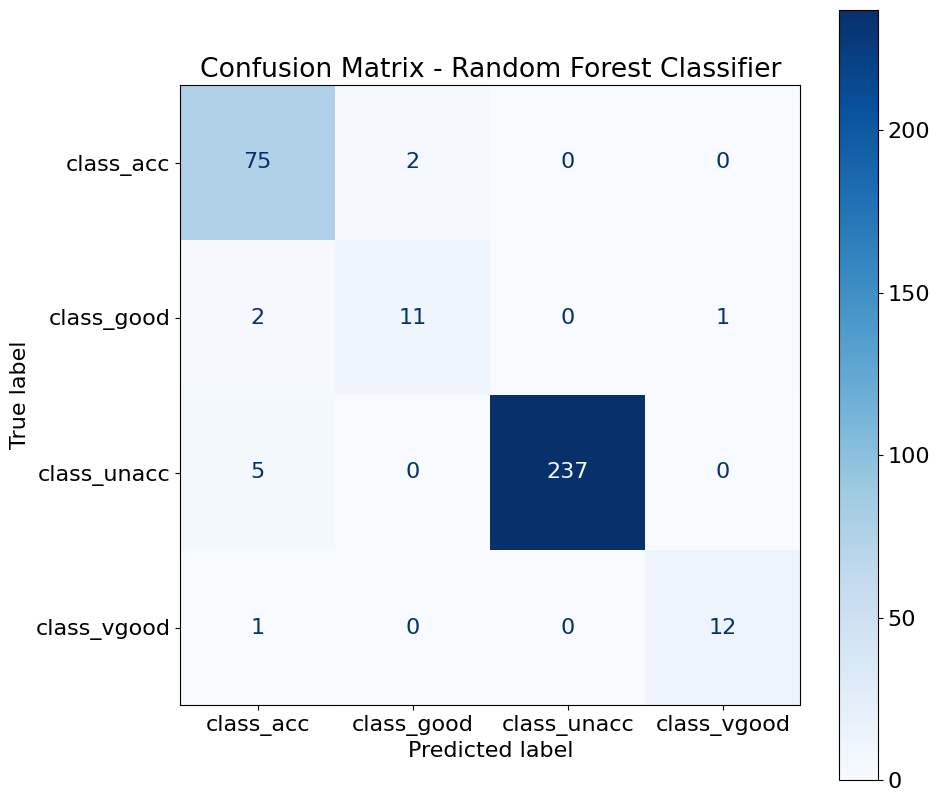

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


plt.rcParams.update({'font.size': 16})

# Creación de la figura para la visualización
fig, axes = plt.subplots(figsize=(10, 10))

# Generación y visualización de la matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(
    modelocRF,
    X_test,
    y_test.idxmax(axis=1),
    display_labels=modelocRF.classes_,
    cmap=plt.cm.Blues,
    ax=axes
)
disp.ax_.set_title('Confusion Matrix - Random Forest Classifier')

# Mostrar la gráfica
plt.show()


Genera y muestra un reporte de clasificación detallado, incluyendo precisión, recall, f1-score para cada clase, y una media armónica de estos para todas las clases.

Este reporte proporciona una vista comprensiva del rendimiento del modelo en términos de métricas estándar de evaluación.

In [ ]:
from sklearn.metrics import classification_report

target_names = ['acceptable', 'good', 'unacceptable', 'very good']


print(classification_report(y_test.idxmax(axis=1), ypred, target_names=target_names))


              precision    recall  f1-score   support

  acceptable       0.90      0.97      0.94        77
        good       0.85      0.79      0.81        14
unacceptable       1.00      0.98      0.99       242
   very good       0.92      0.92      0.92        13

    accuracy                           0.97       346
   macro avg       0.92      0.92      0.92       346
weighted avg       0.97      0.97      0.97       346



Entrena un modelo usando la estrategia OneVsRest con un clasificador Random Forest, para manejar la clasificación multiclase de una manera distinta.

Este enfoque es útil para comparar diferentes metodologías de manejo de clases múltiples en los datos.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

modeloRF_binario = OneVsRestClassifier(RandomForestClassifier())

modeloRF_binario.fit(X_train, y_train)


OneVsRestClassifier(estimator=RandomForestClassifier())

Genera curvas ROC para cada clase y muestra estas curvas con sus respectivos AUC, usando matplotlib.

Estas curvas y los valores AUC proporcionan una medida cuantitativa del rendimiento del modelo en términos de sensibilidad y especificidad ante diversas tasas de falsos positivos.

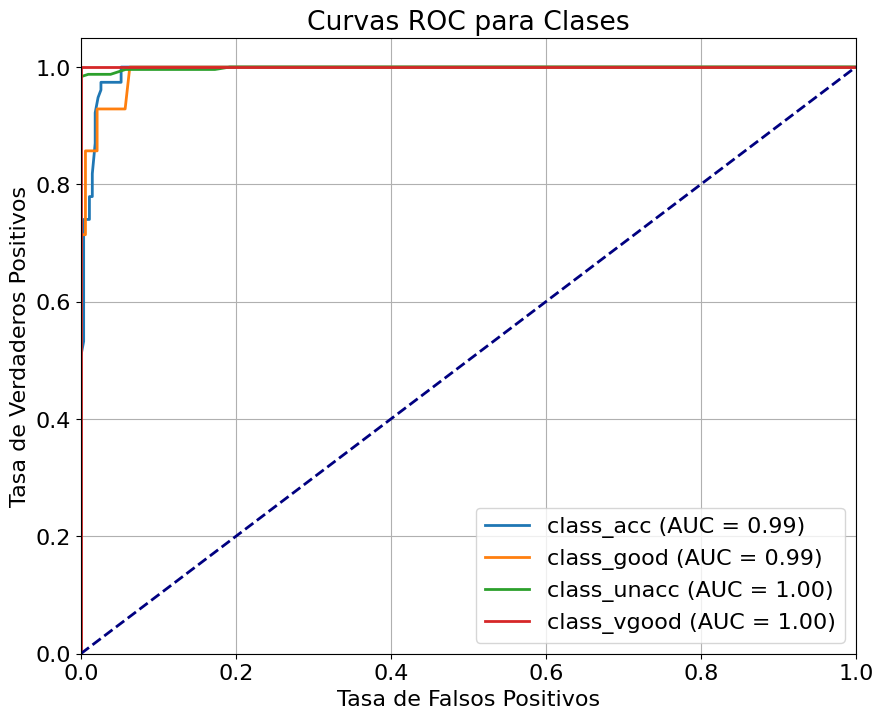

In [ ]:

from sklearn.metrics import auc, roc_curve

plt.figure(figsize=(10, 8))
y_pred_proba = modelocRF.predict_proba(X_test)

for clase in y_test.columns:
    i = y_test.columns.get_loc(clase)
    fpr, tpr, _ = roc_curve(y_test[clase], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{clase} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para Clases')
plt.legend(loc="lower right")
plt.grid()
plt.show()

conclusion final:

Basándome en las imágenes proporcionadas de las curvas ROC, el reporte de clasificación y la matriz de confusión del modelo Random Forest, parece que este modelo ha tenido un desempeño muy bueno para la clasificación del dataset de automóviles.

Los AUC para las clases en las curvas ROC son muy altos, lo que indica una excelente capacidad del modelo para distinguir entre las diferentes clases. La clase "unacceptable" tiene un AUC de 1.00, lo que significa una perfecta separación. La precisión y el recall son también muy altos para esta clase según el reporte de clasificación, corroborando su buen desempeño en esta clase.

La matriz de confusión muestra que la mayoría de las predicciones para todas las clases son correctas, con muy pocos falsos positivos y falsos negativos. La clase con el rendimiento más bajo es "good", pero incluso en este caso, el modelo logra un f1-score de 0.81, que sigue siendo relativamente alto.

Este conjunto de resultados sugiere que el clasificador Random Forest es efectivo para esta tarea particular, ofreciendo una precisión general elevada y una buena capacidad de discriminación para todas las clases del dataset. En conclusión, este modelo es el más adecuado para el problema dado, proporcionando un equilibrio sólido entre sensibilidad y especificidad a lo largo de las clases.